In [47]:
library('datasets')
library('caTools')
library('stats')
library('ggplot2')
library('ggcorrplot')
library('gridExtra')
library('InformationValue')

Warning message:
"package 'InformationValue' was built under R version 3.6.3"


In [2]:
dataset.folder <- c("D:\\personal\\projects\\datasets\\diabetes\\diabetes.csv")

In [3]:
raw.data <- read.table(dataset.folder,header = TRUE,sep = ",")

#### Convert the output column into factor variable

In [4]:
raw.data$label <- ifelse(raw.data$Outcome == 0, "yes", "no")
raw.data$label <- as.factor(raw.data$Outcome)
raw.data$newcol <- sample.split(raw.data$Outcome,SplitRatio =0.7)
head(raw.data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label,newcol
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<lgl>
1,6,148,72,35,0,33.6,0.627,50,1,1,TRUE
2,1,85,66,29,0,26.6,0.351,31,0,0,TRUE
3,8,183,64,0,0,23.3,0.672,32,1,1,TRUE
4,1,89,66,23,94,28.1,0.167,21,0,0,FALSE
5,0,137,40,35,168,43.1,2.288,33,1,1,TRUE
6,5,116,74,0,0,25.6,0.201,30,0,0,TRUE


#### Split the dataset into 70-30 

In [5]:
train.data <- subset(raw.data,raw.data$newcol==TRUE)
test.data <- subset(raw.data,raw.data$newcol==FALSE)
head(train.data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label,newcol
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<lgl>
1,6,148,72,35,0,33.6,0.627,50,1,1,TRUE
2,1,85,66,29,0,26.6,0.351,31,0,0,TRUE
3,8,183,64,0,0,23.3,0.672,32,1,1,TRUE
5,0,137,40,35,168,43.1,2.288,33,1,1,TRUE
6,5,116,74,0,0,25.6,0.201,30,0,0,TRUE
7,3,78,50,32,88,31.0,0.248,26,1,1,TRUE


#### Correlation plot to understand the correlation between variables

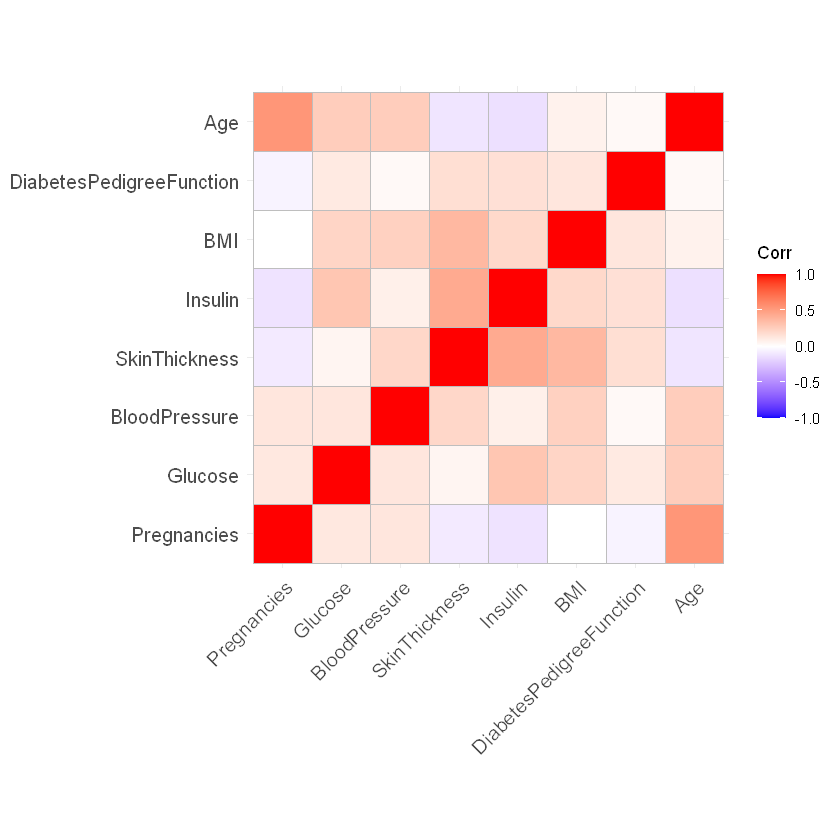

In [9]:
ggcorrplot(cor(train.data[,0:8]))

#### Kernel density estimation of multiple variables

In [29]:
plot_1 <- ggplot(data=train.data,aes(x=Pregnancies,fill=label)) + geom_density(alpha = 0.5)
plot_2 <- ggplot(data=train.data,aes(x=Insulin,fill=label)) + geom_density(alpha = 0.5)
plot_3 <- ggplot(data=train.data,aes(x=BloodPressure,fill=label)) + geom_density(alpha = 0.5)
plot_4 <- ggplot(data=train.data,aes(x=BMI,fill=label)) + geom_density(alpha = 0.5)

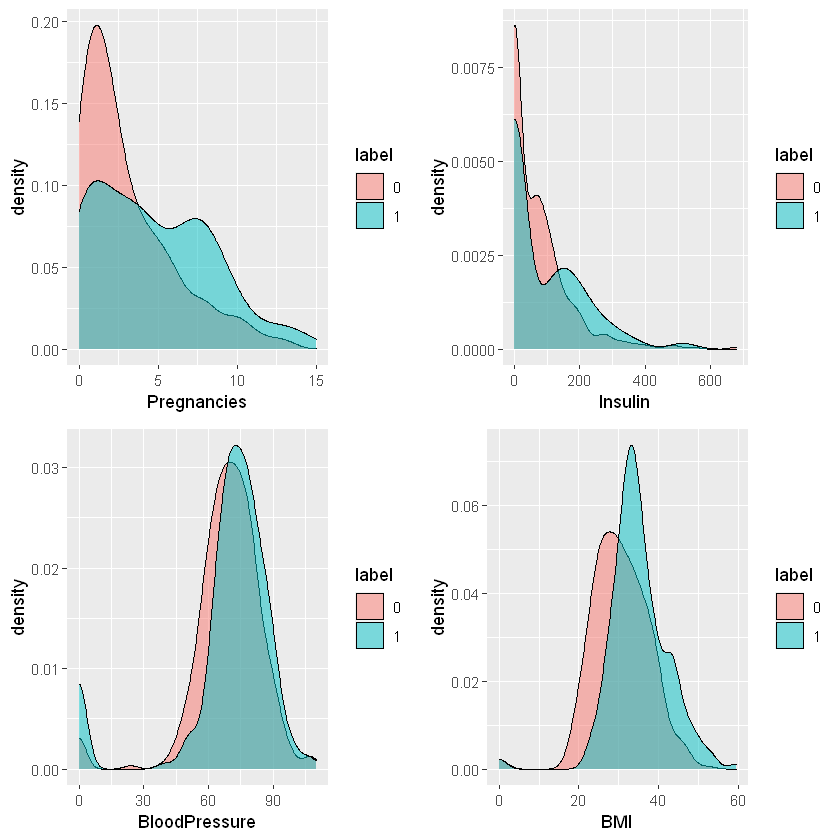

In [30]:
gridExtra::grid.arrange(plot_1,plot_2,plot_3,plot_4,nrow=2,ncol=2,widths=c(4,4),heights=c(4,4))

#### Histograms to undestand the distribution of plots 

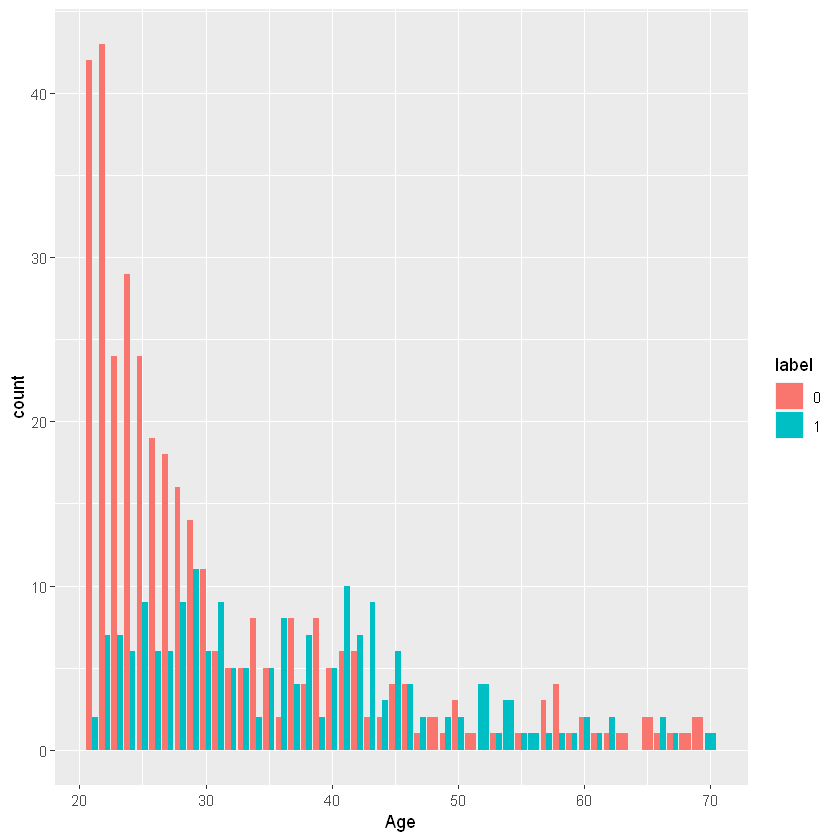

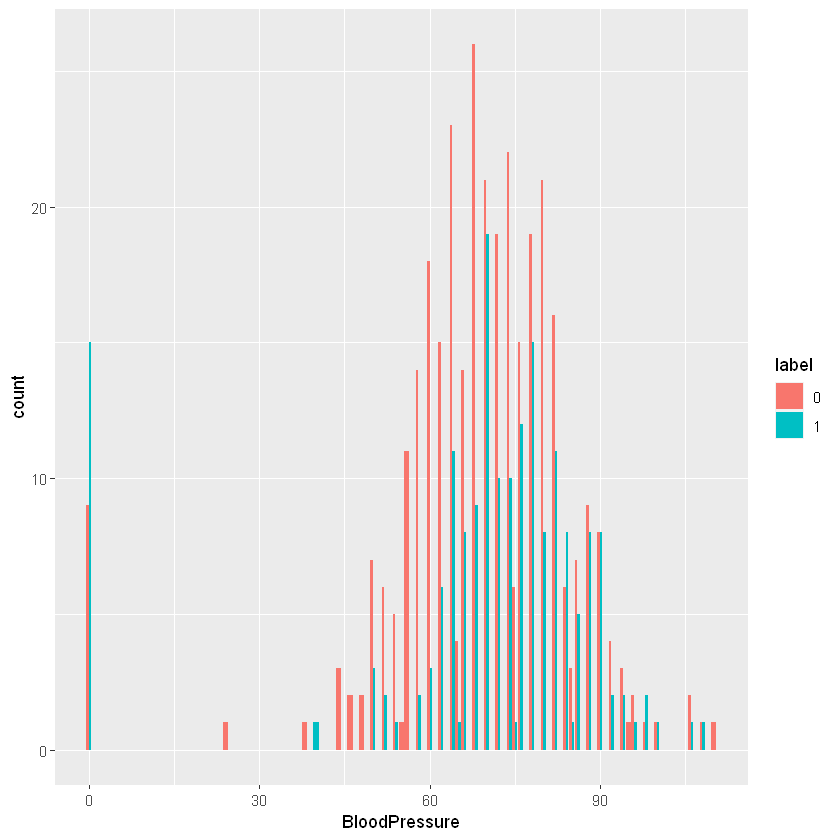

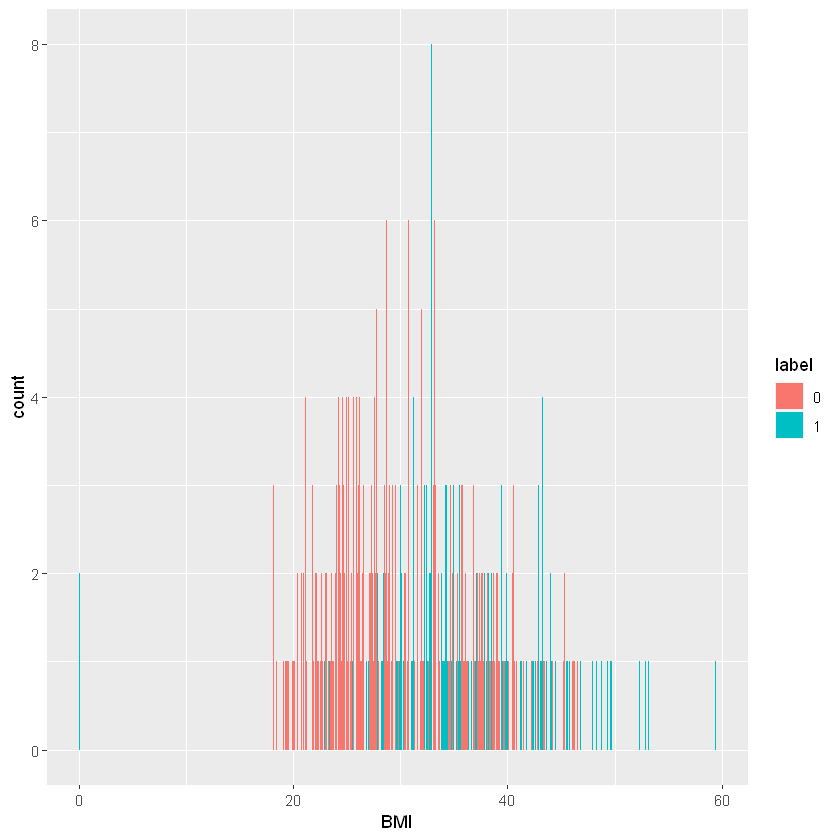

In [33]:
bar_plot_age <- ggplot(train.data,aes(x=Age,fill=label)) + geom_bar(stat='count', position='dodge')
bar_plot_BloodPressure <- ggplot(train.data,aes(x=BloodPressure,fill=label)) + geom_bar(stat='count', position='dodge')
bar_plot_BMI <- ggplot(train.data,aes(x=BMI,fill=label)) + geom_bar(stat='count', position='dodge')
plot(bar_plot_age)
plot(bar_plot_BloodPressure)
plot(bar_plot_BMI)

#### Box plot to understand outlier detection

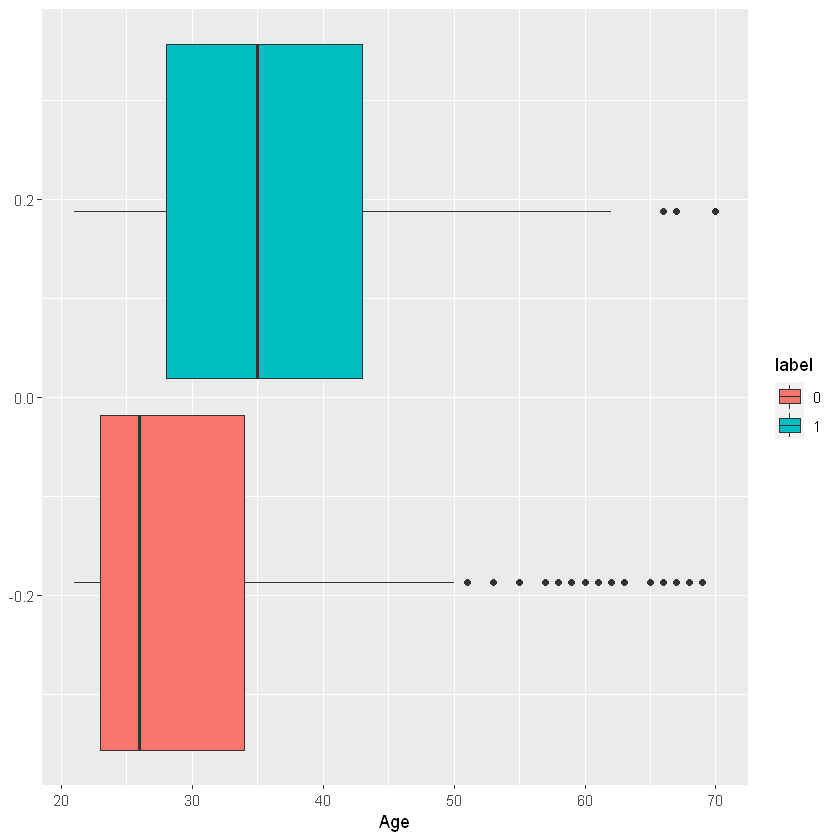

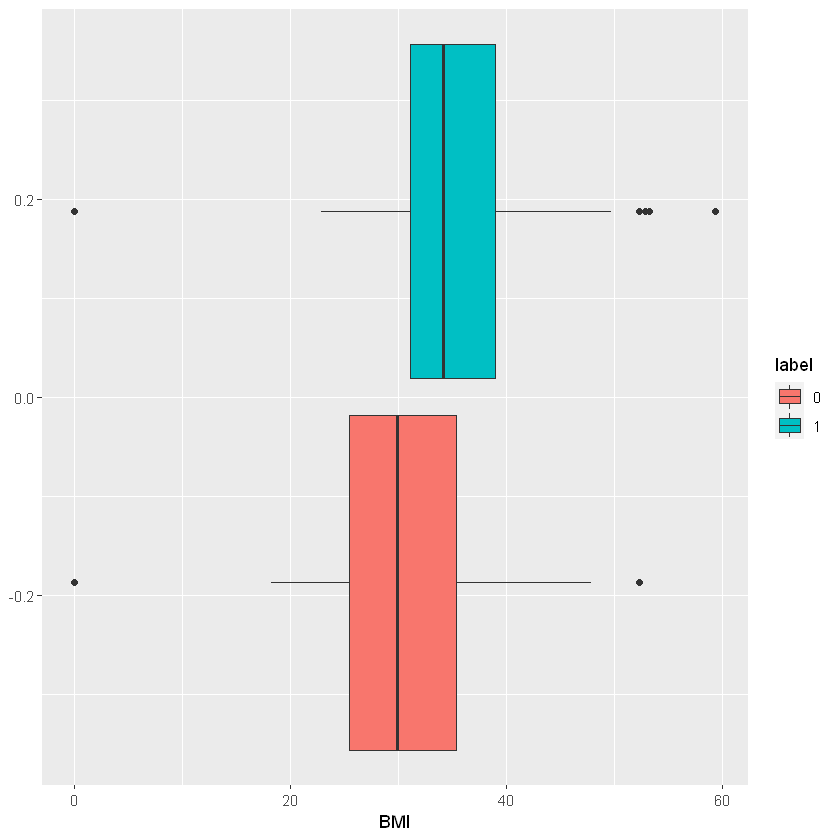

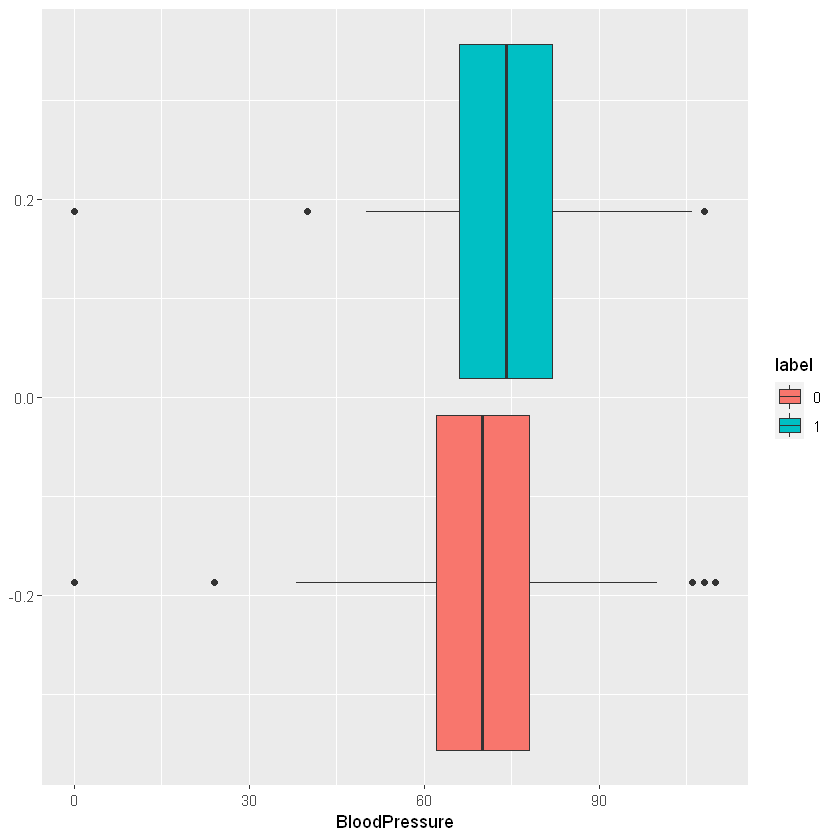

In [37]:
box_plot_age <- ggplot(train.data,aes(x=Age,fill=label)) + geom_boxplot()
box_plot_BloodPressure <- ggplot(train.data,aes(x=BloodPressure,fill=label)) + geom_boxplot()
box_plot_BMI <- ggplot(train.data,aes(x=BMI,fill=label)) + geom_boxplot()
plot(box_plot_age)
plot(box_plot_BMI)
plot(box_plot_BloodPressure)


#### Build a binary logistic regression model

In [40]:
model_glm <- glm(label ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,data=train.data,family=binomial(link='logit'))

### predict the output variables

In [44]:
predicted <- plogis(predict(model_glm,test.data))

#### Identify the optimal cut off value for deciding positive or negative label

In [48]:
optCutOff <- optimalCutoff(test.data$label, predicted)[1] 

In [51]:
summary(model_glm)


Call:
glm(formula = label ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + 
    Age, family = binomial(link = "logit"), data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5736  -0.6952  -0.4274   0.7066   2.6770  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.007096   0.838210  -9.553  < 2e-16 ***
Pregnancies               0.134888   0.039196   3.441 0.000579 ***
Glucose                   0.033993   0.004406   7.716 1.20e-14 ***
BloodPressure            -0.021128   0.006654  -3.175 0.001498 ** 
SkinThickness            -0.006707   0.008202  -0.818 0.413525    
Insulin                  -0.001246   0.001206  -1.034 0.301226    
BMI                       0.099869   0.018644   5.357 8.48e-08 ***
DiabetesPedigreeFunction  0.846038   0.371886   2.275 0.022906 *  
Age                       0.020595   0.011964   1.721 0.085184 .  
---


#### Misclassification to understand the correctness of the model

In [52]:
misClassError(test.data$label, predicted, threshold = optCutOff)

[1] 0.2087

### ROC curve

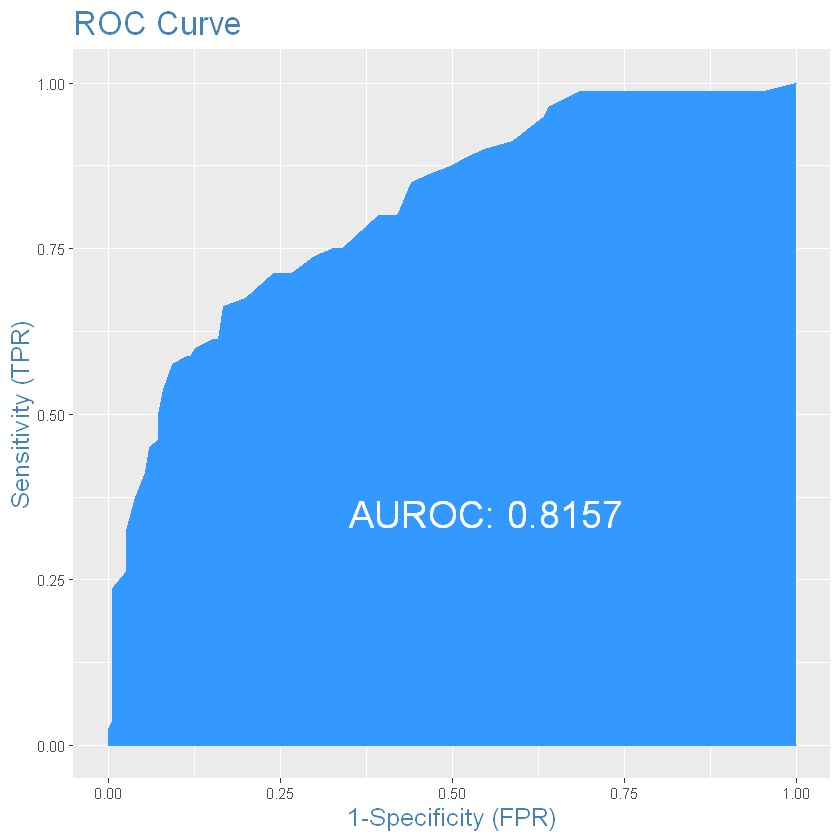

In [53]:
plotROC(test.data$label, predicted)

#### Sensitivity and specificity

In [54]:
sensitivity(test.data$label, predicted, threshold = optCutOff)
specificity(test.data$label, predicted, threshold = optCutOff)

[1] 0.575

[1] 0.9066667

#### Confusion matrix

In [55]:
confusionMatrix(test.data$label, predicted, threshold = optCutOff)

,0,1
,<int>,<int>
0,136,34
1,14,46
